# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import class
from inauguralproject1 import ExchangeEconomyClass
E_class = ExchangeEconomyClass()

# Question 1

<u>**Explanation of how the model is solved**</u>

**Parameterization:** To begin we definine the parameters such as utility functions, initial endowments, and numerical values $ \alpha $, $ \beta $, $\omega_1^A$, $\omega_2^A$ and $N$.

**Utility Functions:** The utility functions for both consumers are defined. These functions represent the preferences of each consumer over the two goods.

**Allocation Grid:** A grid of possible allocations for the first consumer ($ x_1^A $ and $ x_2^A $) is created using `np.linspace()`. This grid represents all possible combinations of goods that can be allocated to the first consumer within the unit interval [0, 1].

**Valid Combinations:** For each combination of $ x_1^A $ and $ x_2^A $ in the grid, the corresponding allocations to the second consumer ($ x_1^B $ and $ x_2^B $) are calculated. If the allocations satisfy the given conditions (both consumers are at least as well off as they were with their initial endowments), they are considered valid and added to the list of valid allocations.

**Plotting:** The valid allocations are plotted in the Edgeworth box using `plt.plot()`.

<u>**Explation of the Edgeworth box**</u>

The Edgeworth box in this first question represents the possible combinations of goods $x_1$ and $x_2$ that can be allocated between two consumers, represtened as Consumer $A$ and Consumer $B$. Each axis of the box represents the quantity of $x_1$ and $x_2$.

In the plot each point corresponds to a combination of $x_1^A$ and $x_2^A$, representing the allocation of goods to Consumer $A$. The set of points in the plot illustrates the possible allocations that satisfy the conditions specified in the problem, which are:

1. Both consumers are at least as well off as they were with their initial endowments.
2. Consumer $B$'s utility is at least as high as with their initial endowment.
3. The quantities of goods allocated to both consumers add up to the total endowment of each good such that
\begin{align*}
\omega_{1}^{B} & =1-\omega_{1}^{A}\\
\omega_{2}^{B} & =1-\omega_{2}^{A}.
\end{align*}


The Edgeworth box provides a visual representation of the possible Pareto improvements relative to the initial endowments which is the egde of dotted area. Points inside the box represent allocations that are mutually beneficial to both consumers, while points on the boundary represent allocations where one consumer's utility cannot be increased without decreasing the other's utility.





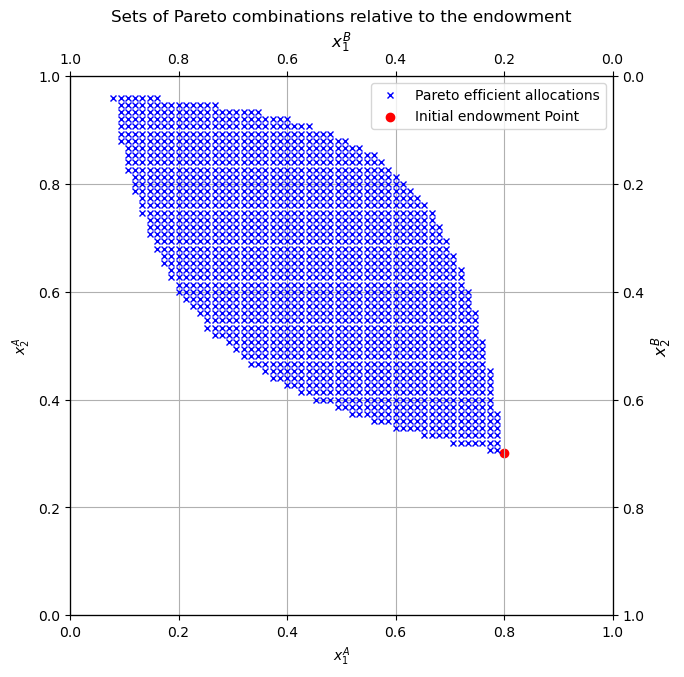

In [2]:
# Run function from class to find the pareto efficient allocations
valid_x1_A, valid_x2_A = E_class.pareto_efficient_allocations()

# Plot the sets in the Edgeworth box
fig, ax = plt.subplots(figsize=(7, 7))  # Increased size from 5x5 to 7x7
ax.plot(valid_x1_A, valid_x2_A, 'bx', markersize=4)  # Plotting valid combinations. 'b' for blue 'x' for cross
ax.scatter(0.8, 0.3, color='red', marker='o', label='Endowment Points')
ax.set_xlabel('$x_1^A$')  # Labeling x-axis
ax.set_ylabel('$x_2^A$')  # Labeling y-axis
ax.set_title('Sets of Pareto combinations relative to the endowment')  # Title of the plot
ax.grid(True)  # Adding grid lines

# Add a legend with the endowment points
ax.legend(['Pareto efficient allocations', 'Initial endowment Point'])

# Set x and y axis limits to the interval [0, 1]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create twin axes for the right and top axes
ax_right = ax.twinx()
ax_top = ax.twiny()

# Set labels for the right and top axes
ax_right.set_ylabel('$x_2^B$', fontsize=12)
ax_top.set_xlabel('$x_1^B$', fontsize=12)

# Align the right and top axes limits with the primary axes and invert them
ax_right.set_ylim(1, 0)
ax_top.set_xlim(1, 0)

# Displaying the plot
plt.show()


# Question 2


The following code calculates the errors in the market clearing conditions $ \epsilon_1$ and $\epsilon_2$ for a given range of $ p_1 $ values and plots them against $p_1$. The code calculates values for the variabels $x_1^{A\ast}$, $x_2^{A\ast}$, $x_1^{B\ast}$ and $x_2^{B\ast}$ with starting point in the created range of $p_1$ values. It is now possible to calculate the errors ($\epsilon_1$ and $\epsilon_2$). 

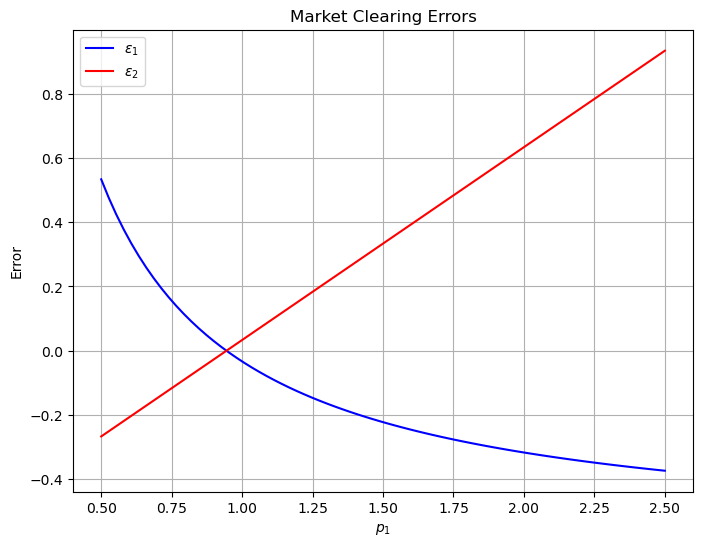

In [3]:
# Range of p1 values
p1_values = np.linspace(0.5, 2.5, E_class.par.N+1)


# Calculate errors for the range of p1 values
market_clearing_errors = E_class.market_clearing_error(p1_values)

# Plot errors
plt.figure(figsize=(8, 6))
plt.plot(p1_values, [error[0] for error in market_clearing_errors], label='$\epsilon_1$', color='blue')
plt.plot(p1_values, [error[1] for error in market_clearing_errors], label='$\epsilon_2$', color='red')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.title('Market Clearing Errors')
plt.legend()
plt.grid(True)
plt.show()


The intersection between the market clearing errors in the figure is the market clearing prices, as the errors in this point equal zero. The market clearing price is determined in the next question.

# Question 3

To find the intersection between the market clearing error curves in the figure above we will use np.isclose. This is a function from NumPy, that evaluates if the sum of $x_1^{A\ast}$ + $x_1^{B\ast}$ approximately equals 1 and the same for $x_2^{A\ast}$ + $x_2^{B\ast}$. If this is true it returns the price ($p_1$). Hereby, we find the market clearing price.

In [4]:
# Calculate market clearing price and set as variabel name p_star
p_star = E_class.market_clearing_price()

#print p_star if found else write that p_star not found
if p_star is not None:
    print(f"The market clearing price is: p_1 = {p_star:.4f}")
else:
    print("No market clearing price found within the given range of p1 values.")

The market clearing price is: p_1 = 0.9444


# Question 4a


We now assume that A chooses the price to maximize her own utility. We now find the allocation if only prices in $\mathcal{P}_{1}$ can be chosen,  i.e.


$max_{p_{1}\in\mathcal{P}_{1}}u^{A}(1-x_{1}^{B}(\boldsymbol{p},\boldsymbol{\omega}^{B}),1-x_{2}^{B}(\boldsymbol{p},\boldsymbol{\omega}^{B}))$.




In [5]:
#Set of prices already defined as p1_values
#Run function to find the optimal allocatin given that consumer A is market maker and prices are discrete
optimal_p_1, optimal_consumption_A, optimal_utility = E_class.maximize_u_A(p1_values)
print(f"Optimal price for consumer A if prices are discrete: {optimal_p_1:.4f}")
print(f"Optimal allocation for consumer A: x1_A={optimal_consumption_A[0]:.4f} and x2_A={optimal_consumption_A[1]:.4f}")
print(f"Maximum utility for consumer A: {optimal_utility:.4f}")

# Save the values of optimal_consumption_A in two new variables
x1_A_q4a = optimal_consumption_A[0]
x2_A_q4a = optimal_consumption_A[1]

Optimal price for consumer A if prices are discrete: 1.8867
Optimal allocation for consumer A: x1_A=0.6193 and x2_A=0.6409
Maximum utility for consumer A: 0.6336


# Question 4b

We now find the allocation if any positive price can be chosen, i.e.

$max_{p_{1}>0}u^{A}(1-x_{1}^{B}(\boldsymbol{p},\boldsymbol{\omega}^{B}),1-x_{2}^{B}(\boldsymbol{p},\boldsymbol{\omega}^{B}))$

In [6]:
# Run function to find the optimal allocatin given that consumer A is market maker and prices are continuous
optimal_price_continuous, optimal_allocation_A_continuous, optimal_utility_continuous = E_class.maximize_u_A_continuous()

# Print results
print(f"Optimal price for consumer A if prices are continuous: {optimal_price_continuous:.4f}")
print(f"Optimal allocation for consumer A: x1_A={optimal_allocation_A_continuous[0]:.4f} and x2_A={optimal_allocation_A_continuous[1]:.4f}")
print(f"Maximum utility for consumer A: {optimal_utility_continuous:.4f}")

Optimal price for consumer A if prices are continuous: 1.8993
Optimal allocation for consumer A: x1_A=0.6210 and x2_A=0.6400
Maximum utility for consumer A: 0.6336


# Question 5a.

In this question we consider consumer A as the market maker, meaning that they have the power of choosing the allocation of both goods. Consumer A will maximize her own utility while not making consumer B worse off than her initial endowment. The course of action is to search through the valid allocation points found in earlier questions and find the one maximizing consumer A's utility. This also ensures that the maximization point is located with the constraints of C.

In [7]:
# We define the economy and the relevant functions in the class ExchangeEconomyClass. The optimal allocation and utility is then found by calling the function optimal_allocation_5a() from this class:
E_class.optimal_allocation_5a()

Optimal Allocation (x1^A, x2^A): (0.5600, 0.8533)
Maximum Utility: 0.7416


# Question 5b.

The course of action in this question is very similar to the one in question 5a. Consumer A is no longer constricted to allocate the good within the constraints of C, meaning we can optimize her utility using the maximize function (negative minimize) from SciPy. We find the results of 5a and 5b be to extremely similar as expected.

In [8]:
# The new model without restriction on consumer A is again defined in the class ExchangeEconomyClass. Based on the new model, the optimal allocation and utility are determined to be:
E_class.optimal_allocation_5b()

Optimal Allocation: xA1 = 0.5757, xA2 = 0.8444, Maximum Utility for A: 0.7432


# Question 6a.

Question 6 implements a utilitarian social planner to choose the allocation of the two goods between consumer A and B with the aim to maximize total utility combined.

$max_{x_{1}^{A}, x_{2}^{A}}u^{A}(x_{1}^{A}, x_{2}^{A})+u^{B}(1-x_{1}^{A}, 1-x_{2}^{A})$

The maximization problem is solved with a code similar to the one used in question 5b.

In [9]:
# For this question, a new function optimal_allocation_6() is defined in the class ExchangeEconomyClass.
# The function finds the optimal allocation and utility for consumer A given that a social planner maximizes the sum of utilities for consumer A and B.
E_class.optimal_allocation_6()

Optimal Allocation: xA1 = 0.3333, xA2 = 0.6667, Maximum Utility for A: 1.0583


# Question 6b.

In the discussion on the allocation of goods in an exchange economy, we explore various approaches ranging from utilitarian optimization to market-clearing prices and individual utility maximization. The utilitarian approach in 6a, which maximizes aggregate utility, aims to balance welfare between consumers, potentially leading to more equitable distributions but not necessarily maximizing individual preferences. On the other hand, determining allocations based on the market-clearing price, as in question 3, focuses on economic equilibrium without directly addressing utility, which may lead to disparities in welfare distribution. Lastly, strategies that prioritize maximizing the utility of one consumer, such as consumer A in question 5, might do so at the expense of the other, highlighting a preference for individual welfare over collective well-being. We point out that the different allocation all are pareto efficient compared to the inital endowments making the 'best' decision a personal and political preference.

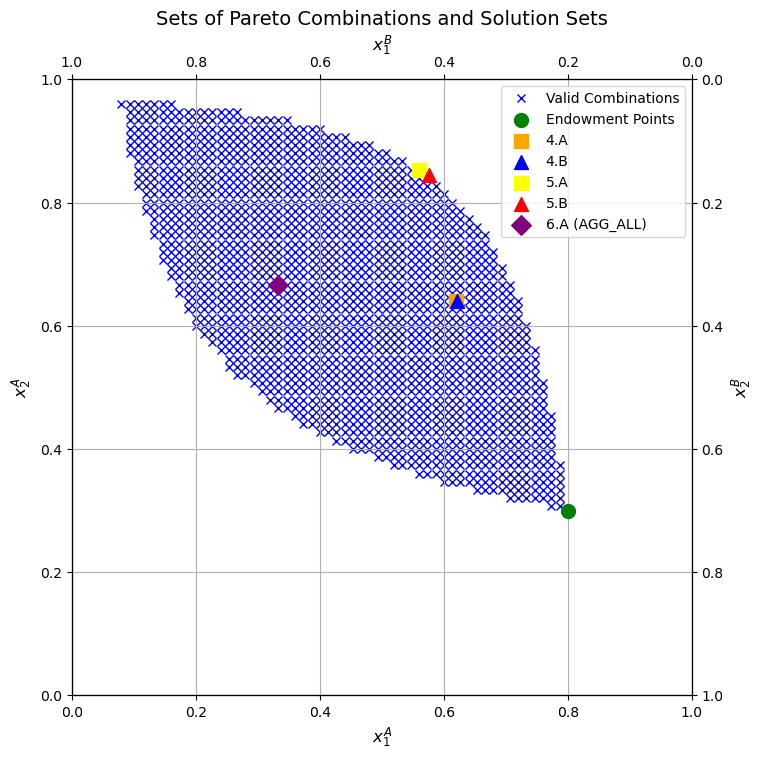

In [10]:
# Given points with labels, colors, and markers
points = {
    '4.A': {'coordinates': (0.6193, 0.6409), 'color': 'orange', 'marker': 's', 'size': 100},
    '4.B': {'coordinates': (0.6210, 0.6400), 'color': 'blue', 'marker': '^', 'size': 100},
    '5.A': {'coordinates': (0.5600, 0.8533), 'color': 'yellow', 'marker': 's', 'size': 100},
    '5.B': {'coordinates': (0.5757, 0.8444), 'color': 'red', 'marker': '^', 'size': 100},
    '6.A (AGG_ALL)': {'coordinates': (0.3333, 0.6667), 'color': 'purple', 'marker': 'D', 'size': 100}
}

# Plot the sets in the Edgeworth box
fig, ax = plt.figure(figsize=(8, 8)), plt.gca()  # Reduced size from 10x10 to 8x8

# Plotting valid combinations in the background
ax.plot(valid_x1_A, valid_x2_A, 'bx', markersize=6, label='Valid Combinations', zorder=1)

# Plot the endowment point
ax.scatter(0.8, 0.3, color='green', marker='o', s=100, label='Endowment Points', zorder=2)

# Insert given points
for label, point_info in points.items():
    coordinates = point_info['coordinates']
    color = point_info['color']
    marker = point_info['marker']
    size = point_info['size']
    
    ax.scatter(coordinates[0], coordinates[1], color=color, marker=marker, s=size, label=label, zorder=3)

# Adding axis labels, title, and grid
ax.set_xlabel('$x_1^A$', fontsize=12)  # Labeling x-axis
ax.set_ylabel('$x_2^A$', fontsize=12)  # Labeling y-axis
ax.set_title('Sets of Pareto Combinations and Solution Sets', fontsize=14)  # Title of the plot
ax.grid(True)  # Adding grid lines

# Add a legend with the endowment points and given points
ax.legend(loc='best', fontsize=10)

# Set x and y axis limits to the interval [0, 1]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create twin axes for the right and top axes
ax_right = ax.twinx()
ax_top = ax.twiny()

# Set labels for the right and top axes
ax_right.set_ylabel('$x_2^B$', fontsize=12)
ax_top.set_xlabel('$x_1^B$', fontsize=12)

# Align the right and top axes limits with the primary axes and invert them
ax_right.set_ylim(1, 0)
ax_top.set_xlim(1, 0)

# Displaying the plot
plt.show()

# Question 7.

We draw 50 randoms elements (endowments) for consumer A. The elements are drawn from the set:
$$
W = \left\{ (\omega_{1}^A, \omega_{2}^A) \mid \omega_{1}^A \sim U(0, 1), \omega_{2}^A \sim U(0, 1) \right\}
$$

The 50 drawn endowments are then displayed in an edgeworth box.

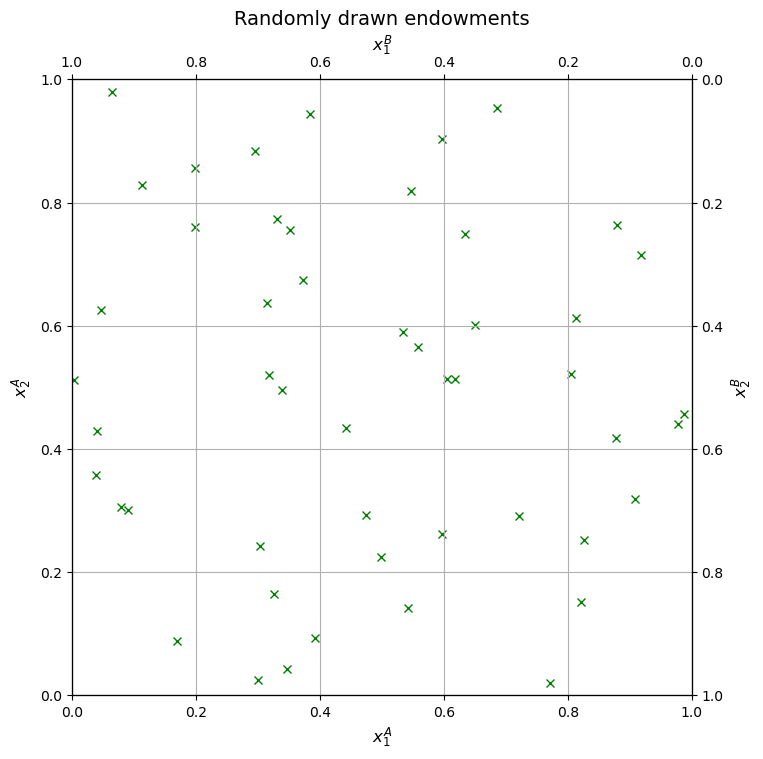

In [11]:
# Generate the list of tuples
W = E_class.generate_W()

# Extracting the values for plotting
omega_1A = [w[0] for w in W]
omega_2A = [w[1] for w in W]

# Plot the sets in the Edgeworth box
fig, ax = plt.subplots(figsize=(8, 8))  # Reduced size from 10x10 to 8x8

# Plotting the generated points W
ax.plot(omega_1A, omega_2A, 'gx', markersize=6, label='Generated Points W', zorder=1)

# Adding axis labels, title, and grid
ax.set_xlabel('$x_1^A$', fontsize=12)  # Labeling x-axis
ax.set_ylabel('$x_2^A$', fontsize=12)  # Labeling y-axis
ax.set_title('Randomly drawn endowments', fontsize=14)  # Title of the plot
ax.grid(True)  # Adding grid lines

# Set x and y axis limits to the interval [0, 1]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create twin axes for the right and top axes
ax_right = ax.twinx()
ax_top = ax.twiny()

# Set labels for the right and top axes
ax_right.set_ylabel('$x_2^B$', fontsize=12)
ax_top.set_xlabel('$x_1^B$', fontsize=12)

# Align the right and top axes limits with the primary axes and invert them
ax_right.set_ylim(1, 0)
ax_top.set_xlim(1, 0)

# Displaying the plot
plt.show()

# Question 8.

We find the market equilibrium allocation for each $\omega^A \in C$ and plot them in an Edgeworth box. This is done by minimizing market clearing errors and finding the corresponding the market clearing prices based on each set of endowments. With these prices, the equilibrium allocations are determined using the demand functions.

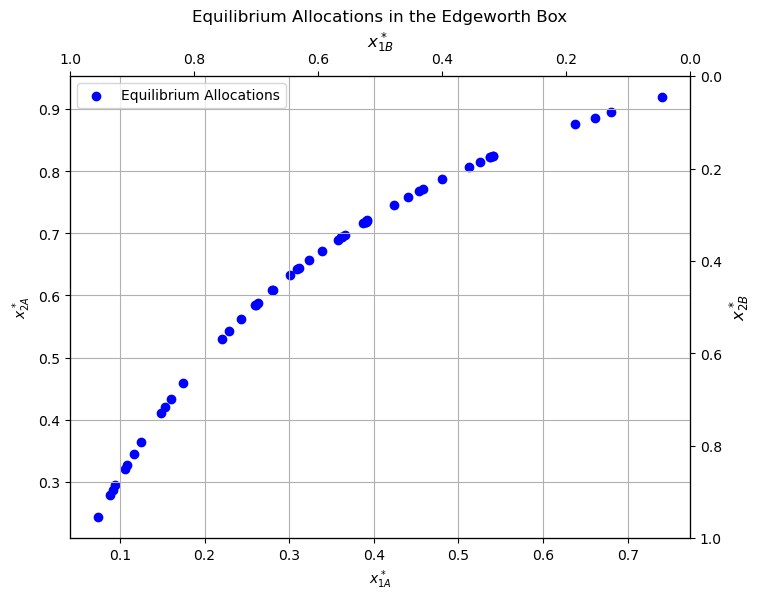

In [14]:
E_class.find_and_plot_equilibria()
